### TensorBoard:
### Tensorflow's visualization tool kit

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-06-26 20:49:54.373241: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-26 20:49:54.376988: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-26 20:49:54.377017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

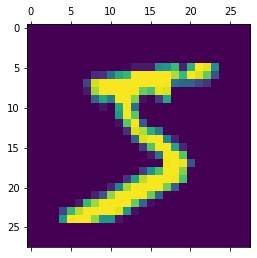

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

2022-06-26 20:49:56.421100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-26 20:49:56.421121: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-26 20:49:56.421134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ZSCHN01LP0253L): /proc/driver/nvidia/version does not exist
2022-06-26 20:49:56.421318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2736 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1232 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0640 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0515 - accuracy: 0.9844


In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD",histogram_freq=1)

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Here SGD is Sohastic Gradient Desent

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 787us/step - loss: 0.6631 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3406 - accuracy: 0.9057
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2915 - accuracy: 0.9186
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2607 - accuracy: 0.9276
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2371 - accuracy: 0.9339


### For visulization 

In [13]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [14]:
model.get_weights()


[array([[-0.05787903,  0.04691069,  0.01296157, ...,  0.06196834,
          0.0235502 , -0.04240781],
        [ 0.07114016, -0.03912723,  0.04503651, ...,  0.01406173,
          0.03044572, -0.0360438 ],
        [-0.04674203,  0.01192863, -0.03649249, ...,  0.06862308,
          0.06525889, -0.04495972],
        ...,
        [-0.01163159, -0.02176049, -0.0641965 , ...,  0.02798617,
          0.05608694,  0.03623381],
        [-0.01426701,  0.00095926,  0.05702771, ...,  0.05326192,
          0.04680888, -0.0324529 ],
        [-0.00286346,  0.00937869,  0.05308151, ..., -0.03764166,
         -0.04237053,  0.00627856]], dtype=float32),
 array([-1.4053768e-03,  3.4157354e-02,  1.1709028e-01,  8.7953568e-02,
         1.6009408e-01, -3.3155172e-03,  1.5221559e-02, -6.9364667e-02,
         6.3838355e-02, -3.7355803e-02, -3.3070825e-02,  5.9404001e-02,
         1.0206239e-01,  1.3539268e-02,  2.9487871e-02,  2.3583993e-02,
        -1.6790768e-02, -6.0710244e-02,  3.9862622e-02,  4.5513328e-02